PART-1: KEŞİFÇİ VERİ  ANALİZİ VE VERİ GÖRSELLEŞTİRME

Veri Seti Hikayesi:

Kullanılan veri seti, bireylerin kredi alma niyetlerini, ekonomik durumlarını ve kredilerle ilgili temel bilgileri içeren bir veri setidir. Veri seti, bireylerin yaş, gelir, iş deneyimi gibi demografik bilgileri; kredi alma niyetleri (eğitim, kişisel harcamalar gibi) ve kredilerle ilgili faiz oranları ile önceki kredi ödeme durumlarını kapsar. 

person_age: Başvuranın yaşı.
person_gender: Başvuranın cinsiyeti.
person_education: Eğitim seviyesi.
person_income: Yıllık gelir.
person_emp_exp: Çalışma tecrübesi (yıl).
person_home_ownership: Ev sahipliği durumu (kiracı, mal sahibi, ipotek).
loan_amnt: Talep edilen kredi tutarı.
loan_intent: Kredinin amacı (eğitim, kişisel, borç konsolidasyonu vb.).
loan_int_rate: Kredi faiz oranı.
loan_percent_income: Gelirin krediye oranı.
cb_person_cred_hist_length: Kredi geçmişi uzunluğu (yıl).
credit_score: Kredi skoru.
previous_loan_defaults_on_file: Önceki kredi temerrüt durumu (var/yok).

loan_status: Kredi başvurusunun onay durumu(Hedef Degisken) (0 = Red, 1 = Onay).

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dosya_yolu = 'C:\\Users\\scorp\\Desktop\\loan_data.csv'
loan_data = pd.read_csv(dosya_yolu)

loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [4]:
gozlem_sayisi = loan_data.shape[0]
print(f"Toplam Gözlem Sayısı: {gozlem_sayisi}")

Toplam Gözlem Sayısı: 45000


In [5]:
betimsel_istatikler = loan_data.describe()

print("Sayısal Değişkenlerin Betimsel İstatistikleri:")
print(betimsel_istatikler)

Sayısal Değişkenlerin Betimsel İstatistikleri:
         person_age  person_income  person_emp_exp     loan_amnt  \
count  45000.000000   4.500000e+04    45000.000000  45000.000000   
mean      27.764178   8.031905e+04        5.410333   9583.157556   
std        6.045108   8.042250e+04        6.063532   6314.886691   
min       20.000000   8.000000e+03        0.000000    500.000000   
25%       24.000000   4.720400e+04        1.000000   5000.000000   
50%       26.000000   6.704800e+04        4.000000   8000.000000   
75%       30.000000   9.578925e+04        8.000000  12237.250000   
max      144.000000   7.200766e+06      125.000000  35000.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count   45000.000000         45000.000000                45000.000000   
mean       11.006606             0.139725                    5.867489   
std         2.978808             0.087212                    3.879702   
min         5.420000             0.000000       

In [6]:
kategorik_degiskenler = loan_data.select_dtypes(include=['object']).columns
frekanslar = {col: loan_data[col].value_counts() for col in kategorik_degiskenler}

print("Kategorik Değişkenler için Sınıf Sayıları ve Frekanslar:")
for col, freq in frekanslar.items():
    print(f"\nDeğişken: ")
    print(freq)

Kategorik Değişkenler için Sınıf Sayıları ve Frekanslar:

Değişken: 
person_gender
male      24841
female    20159
Name: count, dtype: int64

Değişken: 
person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64

Değişken: 
person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64

Değişken: 
loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64

Değişken: 
previous_loan_defaults_on_file
Yes    22858
No     22142
Name: count, dtype: int64


In [7]:
eksik_veriler = loan_data.isnull().sum()

print("Eksik Veriler:")
print(eksik_veriler)

Eksik Veriler:
person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64


In [8]:
def eksikveri_ekle(df, columns, kayip_yuzdesi):
    df_missing = df.copy()
    for col in columns:
        kayıp_indisler = np.random.choice(df_missing.index, 
        size=int(len(df_missing) * kayip_yuzdesi), 
        replace=False)
        df_missing.loc[kayıp_indisler, col] = np.nan
    return df_missing


eksilecek_sutunlar = ['person_income', 'loan_amnt', 'loan_int_rate']
kayıp_yuzdesi = 0.05

loan_data = eksikveri_ekle(loan_data, eksilecek_sutunlar, kayıp_yuzdesi)

missing_values = loan_data.isnull().sum()
print("Eksik ver eklenmiş veri seti:")
print(missing_values)

Eksik ver eklenmiş veri seti:
person_age                           0
person_gender                        0
person_education                     0
person_income                     2250
person_emp_exp                       0
person_home_ownership                0
loan_amnt                         2250
loan_intent                          0
loan_int_rate                     2250
loan_percent_income                  0
cb_person_cred_hist_length           0
credit_score                         0
previous_loan_defaults_on_file       0
loan_status                          0
dtype: int64


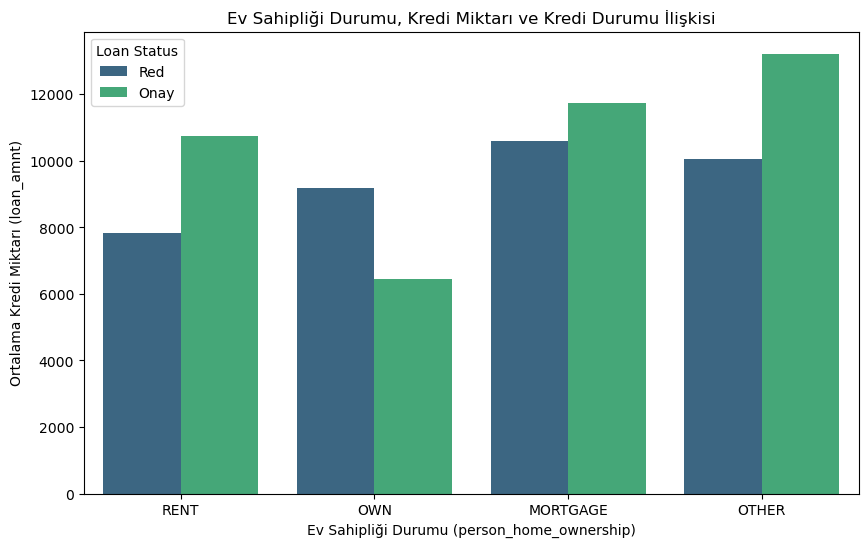

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='person_home_ownership',  
    y='loan_amnt',              
    hue='loan_status',          
    data=loan_data, 
    errorbar=None,
    palette='viridis'           
)
plt.title("Ev Sahipliği Durumu, Kredi Miktarı ve Kredi Durumu İlişkisi")
plt.xlabel("Ev Sahipliği Durumu (person_home_ownership)")
plt.ylabel("Ortalama Kredi Miktarı (loan_amnt)")
plt.legend(title="Loan Status", labels=["Red", "Onay"])
plt.show()


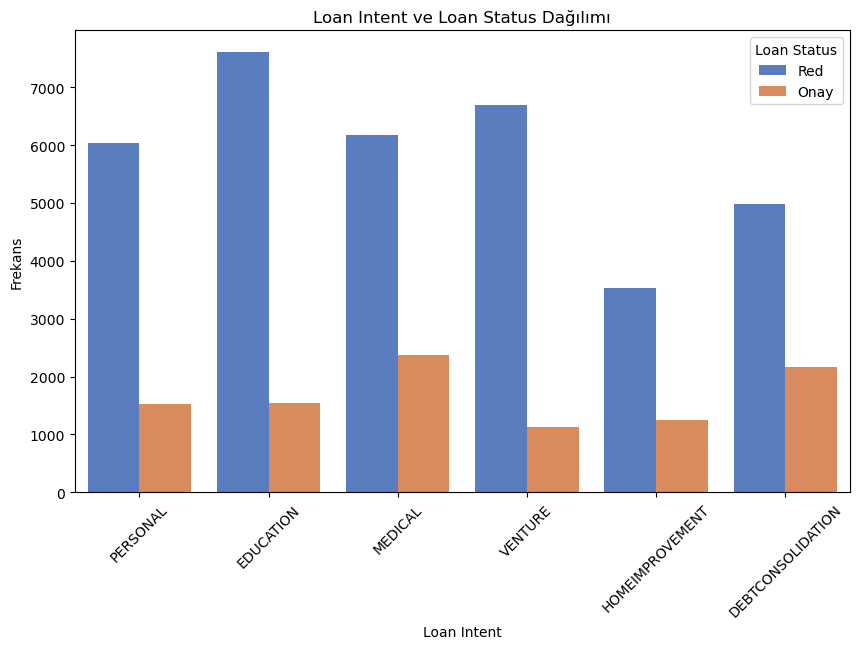

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(
    x='loan_intent',
    hue='loan_status', 
    data=loan_data, 
    palette='muted')
plt.title("Loan Intent ve Loan Status Dağılımı")
plt.xlabel("Loan Intent")
plt.ylabel("Frekans")
plt.xticks(rotation=45)
plt.legend(title="Loan Status", labels=["Red", "Onay"])
plt.show()

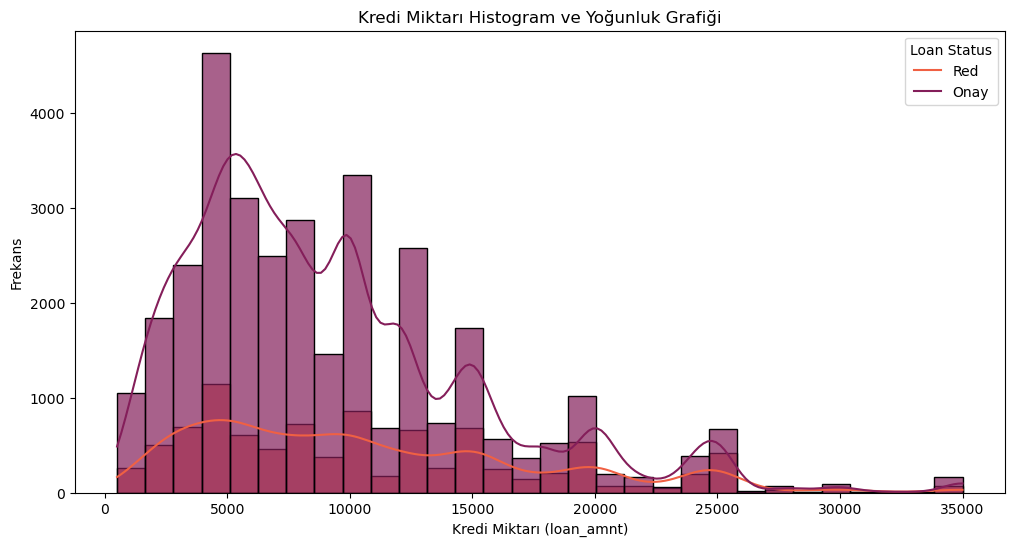

In [11]:
plt.figure(figsize=(12, 6))
sns.histplot(
    data=loan_data,
    x='loan_amnt',
    hue='loan_status',
    kde=True,
    bins=30,
    palette='rocket',
    alpha=0.7
)
plt.title("Kredi Miktarı Histogram ve Yoğunluk Grafiği")
plt.xlabel("Kredi Miktarı (loan_amnt)")
plt.ylabel("Frekans")
plt.legend(title="Loan Status", labels=["Red", "Onay"])
plt.show()

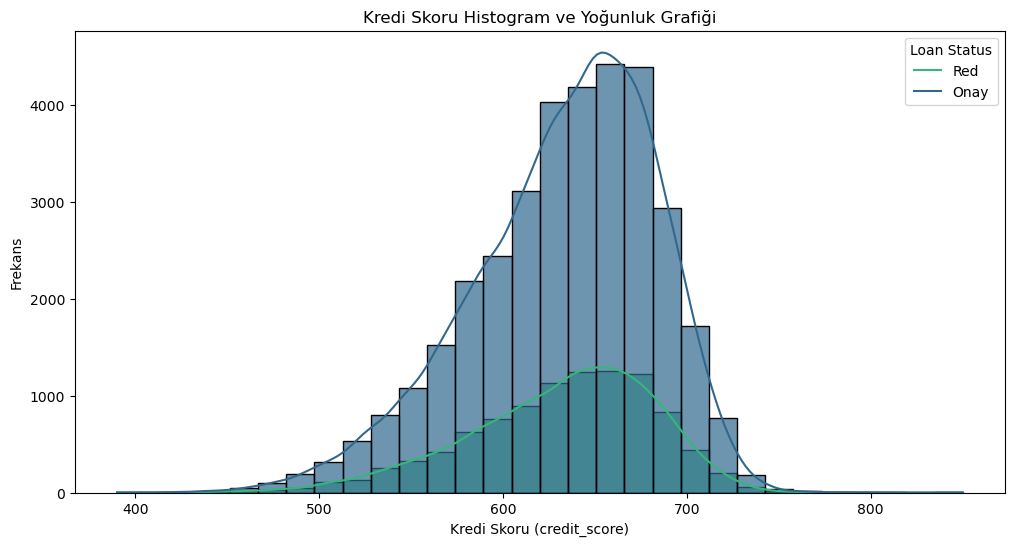

In [12]:
plt.figure(figsize=(12, 6))
sns.histplot(
    data=loan_data,
    x='credit_score',
    hue='loan_status',
    kde=True,
    bins=30,
    palette='viridis',
    alpha=0.7
)
plt.title("Kredi Skoru Histogram ve Yoğunluk Grafiği")
plt.xlabel("Kredi Skoru (credit_score)")
plt.ylabel("Frekans")
plt.legend(title="Loan Status", labels=["Red", "Onay"])
plt.show()

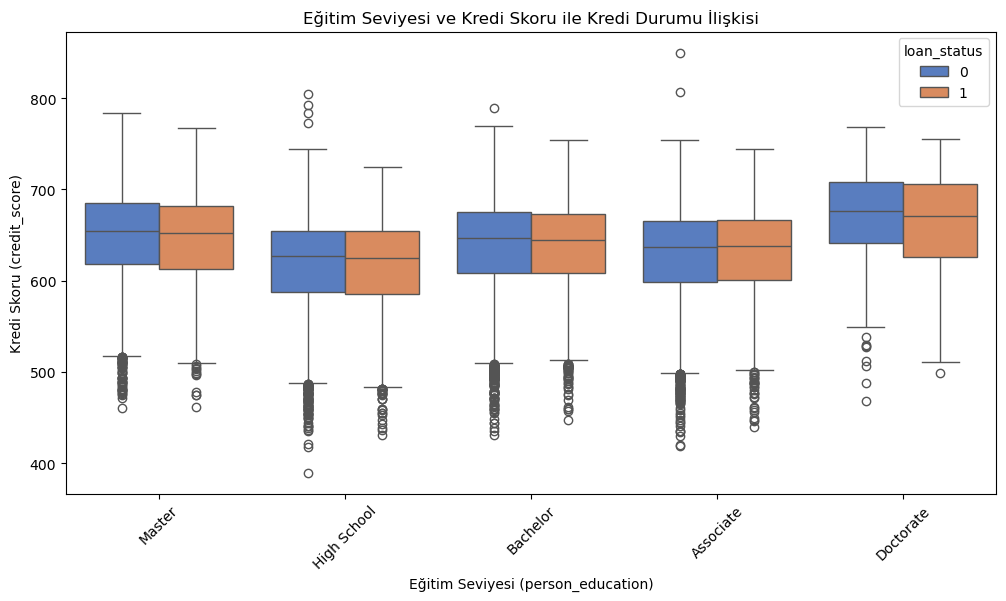

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='person_education', 
    y='credit_score', 
    hue='loan_status', 
    data=loan_data, 
    palette='muted'
)
plt.title("Eğitim Seviyesi ve Kredi Skoru ile Kredi Durumu İlişkisi")
plt.xlabel("Eğitim Seviyesi (person_education)")
plt.ylabel("Kredi Skoru (credit_score)")
plt.xticks(rotation=45)
plt.show()

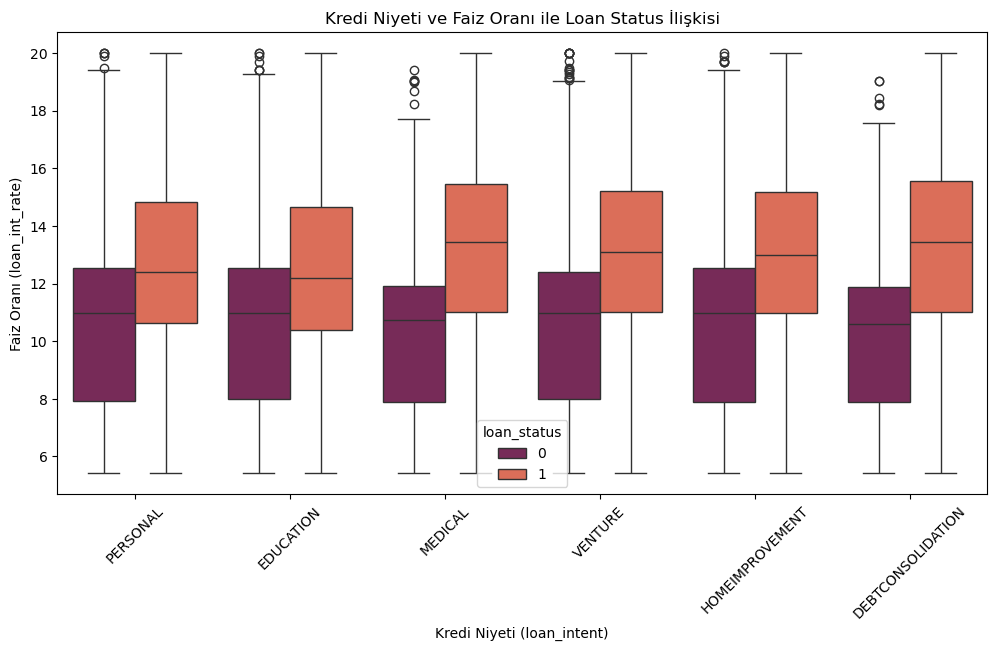

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='loan_intent', 
    y='loan_int_rate', 
    hue='loan_status', 
    data=loan_data, 
    palette='rocket'
)
plt.title("Kredi Niyeti ve Faiz Oranı ile Loan Status İlişkisi")
plt.xlabel("Kredi Niyeti (loan_intent)")
plt.ylabel("Faiz Oranı (loan_int_rate)")
plt.xticks(rotation=45)
plt.show()

PART-2: VERİ ÖN İŞLEME

In [16]:
def fill_outliers(df, target_column):
    
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.difference([target_column])
    
    for column in numerical_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        
        df[column] = df[column].apply(
            lambda x: df[column].median() if x < lower_bound or x > upper_bound else x
        )
    
    return df

target_column = 'loan_status'
loan_data = fill_outliers(loan_data, target_column)

print("Aykırı değerler medyan ile doldurulmuş veri setinin boyutları:", loan_data.shape)


Aykırı değerler medyan ile doldurulmuş veri setinin boyutları: (45000, 14)


In [17]:
loan_data['loan_int_rate'] = loan_data['loan_int_rate'].fillna(loan_data['loan_int_rate'].mean())
loan_data['person_income'] = loan_data['person_income'].fillna(loan_data['person_income'].median())
loan_data['loan_amnt'] = loan_data['loan_amnt'].fillna(loan_data['loan_amnt'].median())

print("Eksik Değerler:\n", loan_data.isnull().sum())

Eksik Değerler:
 person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64


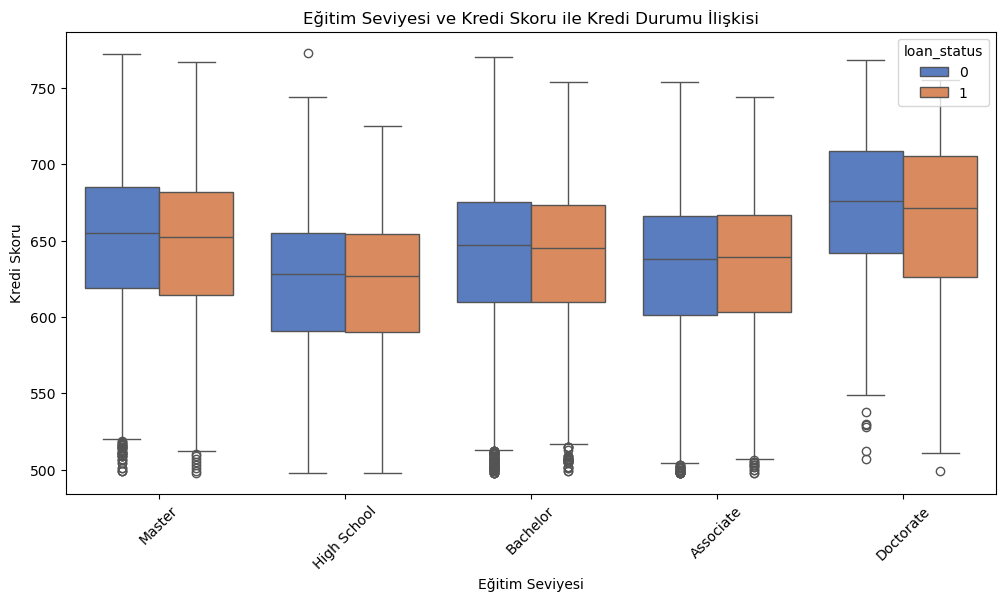

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='person_education', 
    y='credit_score', 
    hue='loan_status', 
    data=loan_data, 
    palette='muted'
)
plt.title("Eğitim Seviyesi ve Kredi Skoru ile Kredi Durumu İlişkisi")
plt.xlabel("Eğitim Seviyesi")
plt.ylabel("Kredi Skoru")
plt.xticks(rotation=45)
plt.show()

In [19]:
categorical_cols = loan_data.select_dtypes(include=['object']).columns
print("Kategorik Değişkenler:", categorical_cols)
categorical_cols = [col for col in categorical_cols if col != 'loan_status']

data_transformed = pd.get_dummies(loan_data, columns=categorical_cols, drop_first=True)

if loan_data['loan_status'].dtype == 'object':
    data_transformed['loan_status'] = loan_data['loan_status'].map({'Red': 0, 'Onay': 1})

bool_cols = data_transformed.select_dtypes(include=['bool']).columns
for col in bool_cols:
    data_transformed[col] = data_transformed[col].astype(int)

print("Yeni Veri Seti Boyutu:", data_transformed.shape)
print(data_transformed.head())

Kategorik Değişkenler: Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent', 'previous_loan_defaults_on_file'],
      dtype='object')
Yeni Veri Seti Boyutu: (45000, 23)
   person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
0        22.0       71948.00             0.0     8000.0          16.02   
1        21.0       12282.00             0.0     1000.0          11.14   
2        25.0       67049.25             3.0     5500.0          12.87   
3        23.0       79753.00             0.0     8000.0          15.23   
4        24.0       66135.00             1.0     8000.0          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  loan_status  \
0                 0.12                         3.0         561.0            1   
1                 0.08                         2.0         504.0            0   
2                 0.12                         3.0         635.0            1   
3                 0.12   

PART-3 SINIFLANDIRMA

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')

In [22]:
X = data_transformed.drop('loan_status', axis=1)  
y = data_transformed['loan_status']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)
 
print("Eğitim veri seti boyutu:", X_train.shape)
print("Test veri seti boyutu:", X_test.shape)

Eğitim veri seti boyutu: (40500, 22)
Test veri seti boyutu: (4500, 22)


In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
lr = LogisticRegression(random_state=42)

param_grid_lr = {
    'penalty': ['l2'],        
    'C': [0.01, 0.1, 1.0],     
    'max_iter': [100, 500]   
}

grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)


best_lr = grid_search_lr.best_estimator_

y_pred_lr = best_lr.predict(X_test)

# Sonuçları yazdır
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))

Logistic Regression:
Accuracy: 0.888
Precision: 0.7594142259414226
F1 Score: 0.7423312883435583
Recall: 0.726


In [25]:
svm = SVC(random_state= 42)

param_grid_svm = {
    'kernel': ['rbf'],      
    'C': [1.0]
}

grid_search_svm = GridSearchCV(svm,param_grid_svm,cv=5,scoring='accuracy')

grid_search_svm.fit(X_train, y_train)

best_svm = grid_search_svm.best_estimator_

y_pred_svm = best_svm.predict(X_test)

print("SVM:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))

SVM:
Accuracy: 0.9086666666666666
Precision: 0.8358038768529077
F1 Score: 0.7810335641981886
Recall: 0.733


In [26]:
gbm = GradientBoostingClassifier(random_state=42)
param_grid_gbm = {
    'n_estimators': [100, 200], 
    'learning_rate': [0.01, 0.1],
    }
grid_search_gbm = GridSearchCV(gbm, param_grid_gbm, cv=5, scoring='accuracy')
grid_search_gbm.fit(X_train, y_train)
 
best_gbm = grid_search_gbm.best_estimator_
y_pred_gbm = best_gbm.predict(X_test)
 
print("Gradient Boosting:")
print("Accuracy:", accuracy_score(y_test, y_pred_gbm))
print("Precision:", precision_score(y_test, y_pred_gbm))
print("F1 Score:", f1_score(y_test, y_pred_gbm))
print("Recall:", recall_score(y_test, y_pred_gbm))

Gradient Boosting:
Accuracy: 0.922
Precision: 0.8734177215189873
F1 Score: 0.812199036918138
Recall: 0.759


In [27]:
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
}

grid_search_rf = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
 
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
 
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))

Random Forest:
Accuracy: 0.924
Precision: 0.8916666666666667
F1 Score: 0.8141304347826087
Recall: 0.749


In [28]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "SVM", "Gradient Boosting"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_gbm)
    ],
    "Precision": [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_svm),
        precision_score(y_test, y_pred_gbm)
    ],
    "Recall": [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_svm),
        recall_score(y_test, y_pred_gbm)
    ],
    "F1 Score": [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_svm),
        f1_score(y_test, y_pred_gbm)
    ]
})

print("Model Karşılaştırma Tablosu:")
print(results)

Model Karşılaştırma Tablosu:
                 Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression  0.888000   0.759414   0.726  0.742331
1        Random Forest  0.924000   0.891667   0.749  0.814130
2                  SVM  0.908667   0.835804   0.733  0.781034
3    Gradient Boosting  0.922000   0.873418   0.759  0.812199


In [29]:
from sklearn.decomposition import PCA

X = data_transformed.drop(columns=['loan_status'])  
y = data_transformed['loan_status']  
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
 
pca = PCA(n_components=10)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
 
print("Eğitim verisi boyutu (PCA sonrası):", X_train_pca.shape)
print("Test verisi boyutu (PCA sonrası):", X_test_pca.shape)

Eğitim verisi boyutu (PCA sonrası): (40500, 10)
Test verisi boyutu (PCA sonrası): (4500, 10)


In [58]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_pca, y_train)

y_pred_pca_rf = model_rf.predict(X_test_pca)

print("Random Forest - PCA Sonrası Performans:")
print("Accuracy:", accuracy_score(y_test, y_pred_pca_rf))
print("Precision:", precision_score(y_test, y_pred_pca_rf))
print("F1 Score:", f1_score(y_test, y_pred_pca_rf))
print("Recall:", recall_score(y_test, y_pred_pca_rf))

Random Forest - PCA Sonrası Performans:
Accuracy: 0.8951111111111111
Precision: 0.8535108958837773
F1 Score: 0.7492029755579172
Recall: 0.6676136363636364
